<a href="https://colab.research.google.com/github/Tannishtharoyc/attendence_automation-pynb.ipynb/blob/main/updated_ATTENDENCE_AUTOMATION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 10.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=a78a03e3a309ac2a2e865c206a9c77ca0116fd3bc0aa6c511e7ecaab36120a23
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepface import DeepFace

24-07-02 22:47:57 - Directory /root/.deepface created
24-07-02 22:47:57 - Directory /root/.deepface/weights created


In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/Training Images-20240623T213230Z-001.zip'
#extract_path = 'path/to/extracted/dataset/'
# Unzip the file
with zipfile.ZipFile(zip_file_path,'r') as zip:
  zip.extractall()
  print('Done')
#with zipfile(zip_file_path, 'r') as zip_ref:
    #zip_ref.extractall()

# List the directories to check the structure
extracted_dirs = os.listdir()
print(extracted_dirs)

Done
['.config', 'Training Images-20240623T213230Z-001.zip', 'drive', 'Training Images', 'sample_data']


In [ ]:
def get_face_embedding(image):
    if image is not None:
        temp_image_path = 'temp_image.jpg'
        cv2.imwrite(temp_image_path, (image * 127.5 + 127.5).astype(np.uint8))  # Convert back to original pixel range
        embedding = DeepFace.represent(img_path=temp_image_path, model_name="Facenet", enforce_detection=False)[0]["embedding"]
        os.remove(temp_image_path)
        return embedding
    else:
        return None

def recognize_face(test_embedding, known_face_encodings, known_face_names):
    distances = [np.linalg.norm(test_embedding - known_face_encoding) for known_face_encoding in known_face_encodings]
    best_match_index = np.argmin(distances)
    if distances[best_match_index] < 0.6:
        return known_face_names[best_match_index]
    else:
        return "Unknown"

def monofacetest(test_directory, known_face_encodings, known_face_names):
    for filename in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, filename)
        test_image = cv2.imread(test_image_path)
        test_image_preprocessed = preprocess_image_for_facenet(test_image)
        if test_image_preprocessed is not None:
            test_embedding = get_face_embedding(test_image_preprocessed)
            if test_embedding is not None:
                name = recognize_face(test_embedding, known_face_encodings, known_face_names)
                plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
                plt.title(f"Person name: {name}")
                plt.axis('off')
                plt.show()


In [ ]:
def draw_faces_on_image(image, faces, known_face_encodings, known_face_names):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax = plt.gca()

    for face in faces:
        facial_area = face['facial_area']
        x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
        face_image = image[y:y+h, x:x+w]
        face_preprocessed = preprocess_image_for_facenet(face_image)

        if face_preprocessed is not None:
            face_embedding = get_face_embedding(face_preprocessed)
            if face_embedding is not None:
                name = recognize_face(face_embedding, known_face_encodings, known_face_names)
                ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2))
                plt.text(x, y - 10, name, color='red', fontsize=12, weight='bold')

    plt.axis('off')
    plt.show()

def multifacetest(test_directory, known_face_encodings, known_face_names):
    for filename in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, filename)
        test_image = cv2.imread(test_image_path)

        faces = DeepFace.extract_faces(img_path=test_image_path, detector_backend='opencv', enforce_detection=False)
        draw_faces_on_image(test_image, faces, known_face_encodings, known_face_names)


In [ ]:
# Load training images
training_dir = r'/content/drive/MyDrive/Directory /Training Images'
train_images, train_labels = load_images_from_directory(training_dir)

NameError: name 'load_images_from_directory' is not defined

In [ ]:
!pip install face_recognition opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=0765b0f6a53fae06c3c624cfce67fdeb42a2d349ed154a81089e6ecc0478d67e
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import os
import cv2
import numpy as np
from PIL import Image, ImageDraw

def load_image(file_path):
    return cv2.imread(file_path)

def encode_faces(image, face_locations):
    encodings = []
    for (top, right, bottom, left) in face_locations:
        face = image[top:bottom, left:right]
        face = cv2.resize(face, (128, 128))  # Resize to 128x128 for simplicity
        encoding = face.flatten()  # Flatten the image array to create a simple encoding
        encodings.append(encoding)
    return encodings

def detect_faces(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    return [(y, x+w, y+h, x) for (x, y, w, h) in faces]

In [ ]:
def monofacetest(directory, known_face_encodings, known_face_names):
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            image = load_image(img_path)
            face_locations = detect_faces(image)
            face_encodings = encode_faces(image, face_locations)

            pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            draw = ImageDraw.Draw(pil_image)

            for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
                matches = [np.linalg.norm(known_face_encoding - face_encoding) < 10000 for known_face_encoding in known_face_encodings]  # Simplified matching
                name = "Unknown"

                if True in matches:
                    first_match_index = matches.index(True)
                    name = known_face_names[first_match_index]

                draw.rectangle(((left, top), (right, bottom)), outline=(0, 0, 255))
                draw.text((left + 6, bottom - 6), name, fill=(255, 255, 255, 255))

            del draw

            pil_image.show()

# Example usage
monoface_detection = r'/content/drive/MyDrive/Directory /Testing Images'

# Load known face images and encode them
try:
    known_image_1 = load_image("/path/to/known_person_1.jpg")
    known_face_locations_1 = detect_faces(known_image_1)
    known_face_encodings_1 = encode_faces(known_image_1, known_face_locations_1)[0]

    known_image_2 = load_image("/path/to/known_person_2.jpg")
    known_face_locations_2 = detect_faces(known_image_2)
    known_face_encodings_2 = encode_faces(known_image_2, known_face_locations_2)[0]

    known_face_encodings = [
        known_face_encodings_1,
        known_face_encodings_2
    ]

    known_face_names = [
        "Person 1",
        "Person 2"
        "Person 3"
        "Person 4"
        "Person 5"
    ]

    monofacetest(monoface_detection, known_face_encodings, known_face_names)

except FileNotFoundError as e:
    print(f"Error loading image: {e}")
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: name 'load_image' is not defined


In [5]:
pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 7.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=88e3a31e7ad72fe2c0a78614a3c915c320be354ca6aa57f9ce48201a2aa26fd7
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [7]:
import os
import cv2
from deepface import DeepFace
import numpy as np

# Load known faces and their names
known_faces = {
    "Tannishtha Roy Chowdhury": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Tannishtha Roy Chowdhury /IMG_6219.JPG",
        "facial_features": None,
        "name": "Tannishtha Roy Chowdhury"
    },
    "Shreya Singha Roy": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Shreya Singha Roy /9626a63f-db9b-4f6d-9215-ba0f07b76d73.jpg",
        "facial_features": None
    },
    "Debarati Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Debarati Sarkar/7f7c2ccf-3052-452e-92e4-fbce5a0e2921.jpg",
        "facial_features": None
    },
    "Aishi Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Aishi Sarkar/IMG-20240604-WA0038.jpg",
        "facial_features": None
    },
    "Om Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Aishi Sarkar/IMG-20240604-WA0040.jpg",
        "facial_features": None
    }
}

def monofacetest(image_directory, known_faces):
    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error loading {image_name}: Invalid image file")
            continue

        try:
            # Extract the face from the image
            results = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)

            if not results:
                print(f"No face found in {image_name}")
                continue

            # Process only the first face found in the image
            face_region = results[0]

            # Verify the detected face against the known faces
            found_match = False
            for name, details in known_faces.items():
                known_image_path = details["image_path"]
                try:
                    result = DeepFace.verify(img1_path=image_path, img2_path=known_image_path, enforce_detection=False)
                    if result["verified"]:
                        distance = result["distance"]
                        print(f"Detected {name} in {image_name} with distance: {distance}")
                        found_match = True
                        break
                except Exception as e:
                    print(f"Error verifying {name} in {image_name}: {str(e)}")

            if not found_match:
                print(f"Unknown face detected in {image_name}")

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

# Example usage
monoface_detection = '/content/drive/MyDrive/Directory /Testing Images'
monofacetest(monoface_detection, known_faces)


Detected Tannishtha Roy Chowdhury in 1000221691.webp with distance: 0.3356976409479583
Unknown face detected in IMG_20230311_133422_151_Original.JPG
Unknown face detected in IMG_20230311_100830_258_Original.JPG
Detected Shreya Singha Roy in 1000243414.jpg with distance: 0.5050292154963449
Detected Tannishtha Roy Chowdhury in 1000240110.jpg with distance: 0.6388661762130483
Detected Tannishtha Roy Chowdhury in 1000204691.jpg with distance: 0.4376912734498404
Detected Tannishtha Roy Chowdhury in IMG_1916.JPG with distance: 0.5600244685983167
Detected Debarati Sarkar in 1000226089.jpg with distance: 0.6269199331211597
Detected Tannishtha Roy Chowdhury in IMG_3251.JPG with distance: 0.6685431793412964
Detected Tannishtha Roy Chowdhury in IMG_1839.JPG with distance: 0.37219135392104563
Detected Tannishtha Roy Chowdhury in IMG_5741.JPG with distance: 0.6543235422207262
Detected Tannishtha Roy Chowdhury in IMG_6074.JPG with distance: 0.57720814286808
Detected Tannishtha Roy Chowdhury in IMG_6

In [6]:
import os
import cv2
from deepface import DeepFace
import numpy as np

# Load known faces and their names
known_faces = {
    "Tannishtha Roy Chowdhury": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Tannishtha Roy Chowdhury /IMG_6218.JPG",
        "facial_features": None,
        "name": "Tannishtha Roy Chowdhury"
    },
    "Shreya Singha Roy": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Shreya Singha Roy /27124ff3-912a-44b5-b5cd-68a6a6a0f426.jpg",
        "facial_features": None
    },
    "Debarati Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Debarati Sarkar/7f7c2ccf-3052-452e-92e4-fbce5a0e2921.jpg",
        "facial_features": None
    },
    "Aishi Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Aishi Sarkar/IMG-20240604-WA0046.jpg",
        "facial_features": None
    },
    "Om Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Om Sarkar/Img-20240604-WA0035.jpg",
        "facial_features": None
    }
}

def multifacetest(image_directory, known_faces):
    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error loading {image_name}: Invalid image file")
            continue

        try:
            # Extract faces from the image
            results = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)

            if not results:
                print(f"No faces found in {image_name}")
                continue

            # Loop through each face found in the image
            for face_region in results:
                # Verify the detected face against the known faces
                found_match = False
                for name, details in known_faces.items():
                    known_image_path = details["image_path"]
                    try:
                        result = DeepFace.verify(img1_path=image_path, img2_path=known_image_path, enforce_detection=False)
                        if result["verified"]:
                            distance = result["distance"]
                            print(f"Detected {name} in {image_name} with distance: {distance}")
                            found_match = True
                            break
                    except Exception as e:
                        print(f"Error verifying {name} in {image_name}: {str(e)}")

                if not found_match:
                    print(f"Unknown face detected in {image_name}")

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

# Example usage
multiface_detection = '/content/drive/MyDrive/Directory /Testing Images'
multifacetest(multiface_detection, known_faces)

24-06-29 22:49:30 - Directory /root/.deepface created
24-06-29 22:49:30 - Directory /root/.deepface/weights created
24-06-29 22:49:37 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:07<00:00, 78.8MB/s]


Detected Tannishtha Roy Chowdhury in 1000221691.webp with distance: 0.30011853208536077
Detected Tannishtha Roy Chowdhury in 1000221691.webp with distance: 0.30011853208536077
Detected Tannishtha Roy Chowdhury in 1000221691.webp with distance: 0.30011853208536077
Unknown face detected in IMG_20230311_133422_151_Original.JPG
Unknown face detected in IMG_20230311_100830_258_Original.JPG
Detected Shreya Singha Roy in 1000243414.jpg with distance: 0.45957399909955676
Detected Shreya Singha Roy in 1000243414.jpg with distance: 0.45957399909955676
Detected Tannishtha Roy Chowdhury in 1000240110.jpg with distance: 0.641289762003628
Detected Tannishtha Roy Chowdhury in 1000240110.jpg with distance: 0.641289762003628
Detected Tannishtha Roy Chowdhury in 1000204691.jpg with distance: 0.32486172466463403
Detected Tannishtha Roy Chowdhury in 1000204691.jpg with distance: 0.32486172466463403
Detected Tannishtha Roy Chowdhury in IMG_1916.JPG with distance: 0.5036051593394483
Detected Tannishtha Roy 

In [4]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from deepface import DeepFace
import psycopg2
from psycopg2 import sql
import datetime

In [1]:
!pip install psycopg2-binary

In [12]:
import psycopg2
from psycopg2 import OperationalError

# Define the connection parameters
db_postgres = {
    'host': 'localhost',
    'port': '5432',
    'dbname': 'postgres',
    'user': 'postgres',
    'password': 'T@n!stha@02'
}

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_postgres)
    cursor = conn.cursor()
    print("Connection to PostgreSQL database successful")

    # Your database operations go here

    # Close the cursor and connection
    cursor.close()
    conn.close()
except OperationalError as e:
    print(f"The error '{e}' occurred")


The error 'connection to server at "localhost" (127.0.0.1), port 5432 failed: Connection refused
	Is the server running on that host and accepting TCP/IP connections?
connection to server at "localhost" (::1), port 5432 failed: Cannot assign requested address
	Is the server running on that host and accepting TCP/IP connections?
' occurred


In [13]:
# Preload subject time ranges
subject_time_ranges = []

def preload_subject_time_ranges():
    cursor.execute(sql.SQL('SELECT id, name, "from_time", "to_time" FROM "Clg automated"."Subject"'))
    rows = cursor.fetchall()
    for row in rows:
        subject_time_ranges.append({
            "id": row[0],
            "name": row[1],
            "from_time": row[2],
            "to_time": row[3]
        })

In [14]:
def get_subject_id_by_time(time):
    for subject in subject_time_ranges:
        if subject["from_time"] <= time <= subject["to_time"]:
            return subject["id"], subject["name"]
    return None, None

In [69]:
def extract_datetime_from_filename(filename):
    # Extract the relevant part of the filename for datetime parsing
    datetime_string = filename[:17]  # Extract the first 17 characters (YYYYMMDDHHMMSS)
    return datetime.datetime.strptime(datetime_string, "%Y%m%d%H%M%S").time() # Include %S to parse seconds if present

In [16]:
def preprocess_image(image):
    if image is not None and image.size != 0:
        image = cv2.resize(image, (224, 224))  # VGG-Face expects 224x224 images
        image = image / 255.0  # Normalize
        return image
    else:
        return None

In [17]:
def load_images_from_directory(base_dir):
    images = []
    labels = []
    for person_name in os.listdir(base_dir):
        person_dir = os.path.join(base_dir, person_name)
        for filename in os.listdir(person_dir):
            img_path = os.path.join(person_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(person_name)
    return images, labels

In [18]:
def get_face_embedding(image):
    if image is not None:
        return DeepFace.represent(img_path=image, model_name="VGG-Face", enforce_detection=False)[0]["embedding"]
    else:
        return None

In [19]:
def recognize_face(test_embedding, known_face_encodings, known_face_names):
    distances = [np.linalg.norm(test_embedding - known_face_encoding) for known_face_encoding in known_face_encodings]
    best_match_index = np.argmin(distances)
    if distances[best_match_index] < 0.6:
        return known_face_names[best_match_index]
    else:
        return "Unknown"

In [73]:
def mark_attendance(id,Date,subject_id,student_id,Image):
    if subject_id is None:
        print(f"No subject found for the specified time.")
        return
    for student in students:
        student_id = get_student_id_by_name(student)
        if student_id is None:
            print(f"Student '{student}' not found in the database.")
            continue # This line was incorrectly indented
        cursor.execute(sql.SQL('INSERT INTO "student.attendance"."Attendance" (date, subject_id, student_id, image) VALUES (%s, %s, %s, %s)'),
            [date, subject_id, student_id, image_name]) # Dedent this line to match the 'for' loop

In [29]:
def get_student_id_by_name(name):
    cursor.execute(sql.SQL('SELECT id FROM "student.attendence"."Student" WHERE "Name" = %s'), [name])
    result = cursor.fetchone()
    return result[0] if result else None

In [74]:
import os
import cv2
import matplotlib.pyplot as plt

def test_on_mono_faces(test_directory, known_face_encodings, known_face_names):
    for filename in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, filename)
        test_image = cv2.imread(test_image_path)

        if test_image is None:
            print(f"Failed to read image {test_image_path}")
            continue

        test_image_preprocessed = preprocess_image(test_image)

        if test_image_preprocessed is None:
            print(f"Preprocessing failed for image {test_image_path}")
            continue

        test_embedding = get_face_embedding(test_image_preprocessed)

        if test_embedding is None:
            print(f"No face detected in image {test_image_path}")
            continue

        name = recognize_face(test_embedding, known_face_encodings, known_face_names)

        if name is None:
            print(f"Face not recognized in image {test_image_path}")
            name = "Unknown"

        plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Recognized person: {name}")
        plt.axis('off')
        plt.show()

def preprocess_image(image):
    # Placeholder for preprocessing function
    # Add your preprocessing steps here
    return image

def get_face_embedding(image):
    # Placeholder for function to get face embedding
    # Add your face detection and embedding steps here
    # Return None if no face is detected
    return None

def recognize_face(embedding, known_face_encodings, known_face_names):
    # Placeholder for face recognition function
    # Add your recognition steps here
    # Return None if face is not recognized
    return None


In [32]:
def test_on_multi_faces(test_directory, known_face_encodings, known_face_names):
    for filename in os.listdir(test_directory):
        test_image_path = os.path.join(test_directory, filename)
        test_image = cv2.imread(test_image_path)

        faces = DeepFace.extract_faces(img_path=test_image_path, detector_backend='opencv', enforce_detection=False)

        plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
        ax = plt.gca()

        recognized_names = []

        for face in faces:
            facial_area = face['facial_area']
            x, y, w, h = facial_area['x'], facial_area['y'], facial_area['w'], facial_area['h']
            face_image = test_image[y:y+h, x:x+w]
            face_preprocessed = preprocess_image(face_image)
            if face_preprocessed is not None:
                face_embedding = get_face_embedding(face_preprocessed)
                if face_embedding is not None:
                    name = recognize_face(face_embedding, known_face_encodings, known_face_names)
                    if name != "Unknown":
                        recognized_names.append(name)
                    ax.add_patch(plt.Rectangle((x, y), w, h, edgecolor='red', facecolor='none', linewidth=2))
                    plt.text(x, y - 10, name, color='red', fontsize=12, weight='bold')

        plt.axis('off')
        plt.show()

        # Extract time from filename and get subject
        # **Update location**
        time = extract_datetime_from_filename(filename.split('.')[0])  # Strip the extension
        subject_id, subject_name = get_subject_id_by_time(time)

        if recognized_names and subject_id is not None:
            date = datetime.datetime.strptime(filename[:8], "%Y%m%d").date()
            print(f"Students {recognized_names} attended {subject_name} on {date}")
            mark_attendance(subject_name, subject_id, date, recognized_names, filename)

In [78]:
# Load training images
training_dir = r'/content/drive/MyDrive/Directory /Training Images'
train_images, train_labels = load_images_from_directory(training_dir)

In [79]:
# Preprocess and encode training images
known_face_encodings = []
known_face_names = []
for img, label in zip(train_images, train_labels):
    img_preprocessed = preprocess_image(img)
    if img_preprocessed is not None:
        embedding = get_face_embedding(img_preprocessed)
        if embedding is not None:
            known_face_encodings.append(np.array(embedding))
            known_face_names.append(label)

Current working directory: /content
Contents of MyDrive: ['Document (1).docx', 'sid.pdf', 'SPSS Statistics v23 x64 (1)', 'SPSS Statistics v23 x64', 'Happy Birthday Netra ❤️', 'water filter warranty card fbbae528-088d-44b3-945f-add25935c728.pdf', 'Document', 'IMG-20210726-WA0004.jpg', 'IMG-20210726-WA0005.jpg', 'Kundli', 'Cv', 'Movie', 'WPIF-8.5-01B -APPLICATION FORM (OFFSHORE).docx', 'Finance Interview Questions And Answers.pdf', 'Finance Interview Questions ', 'Screenshot_2023-06-08-16-19-38-610_com (1).google.android.gm.jpg', 'Screenshot_2023-06-08-16-19-38-610_com.google.android.gm.jpg', 'Population-Latin-and-Caribbean-Countries-2010-2019.xlsx', 'Copy of Formulas for Google Sheets Draft (3).gsheet', 'Untitled spreadsheet (2).gsheet', 'Untitled spreadsheet (1).gsheet', 'Copy of Formulas for Google Sheets Draft (2).gsheet', 'Copy of Formulas for Google Sheets Draft (1).gsheet', 'Copy of Formulas for Google Sheets Draft.gsheet', 'Data Analytics assignment.xlsx', 'Sample Size Calculator

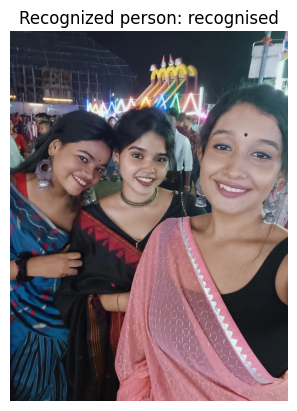

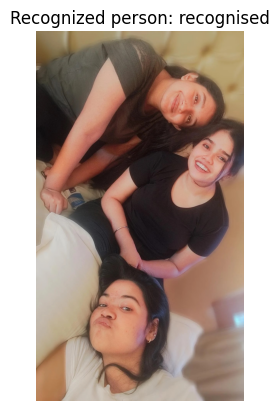

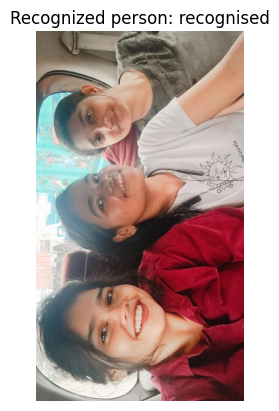

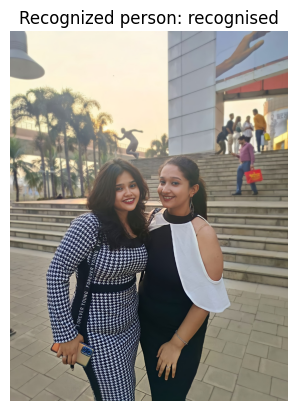

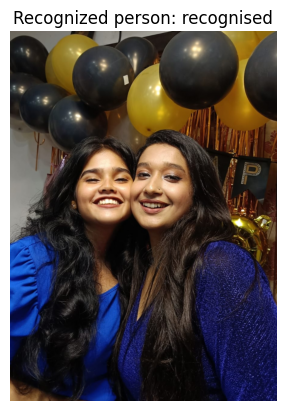

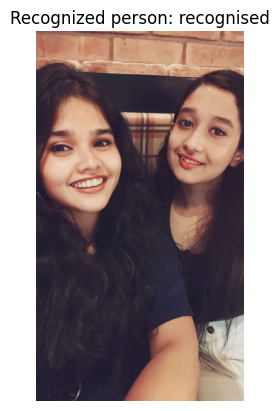

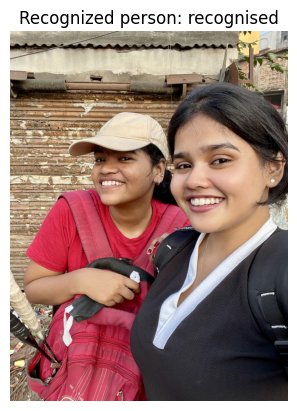

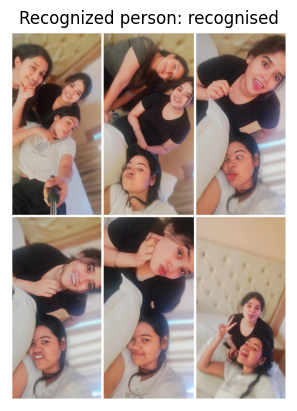

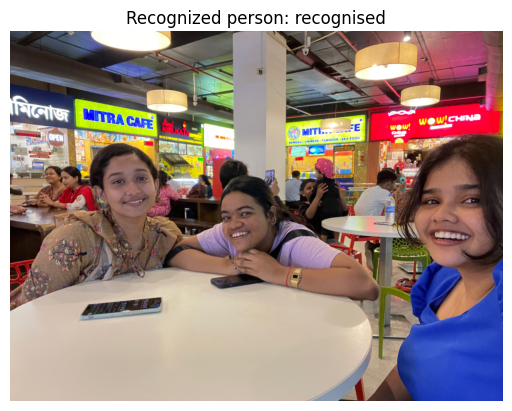

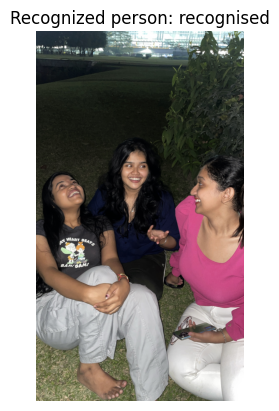

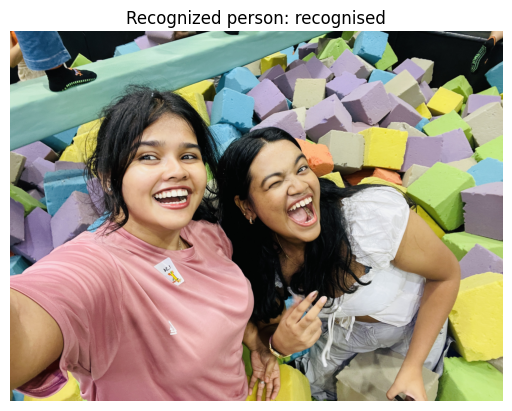

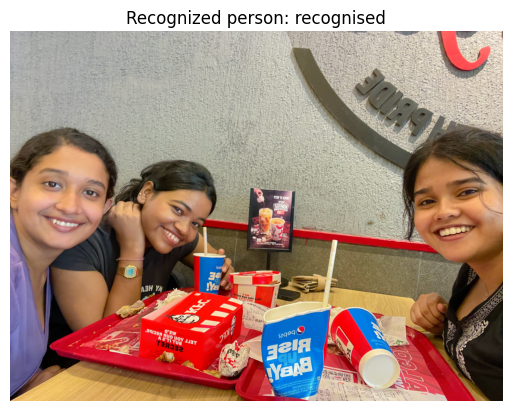

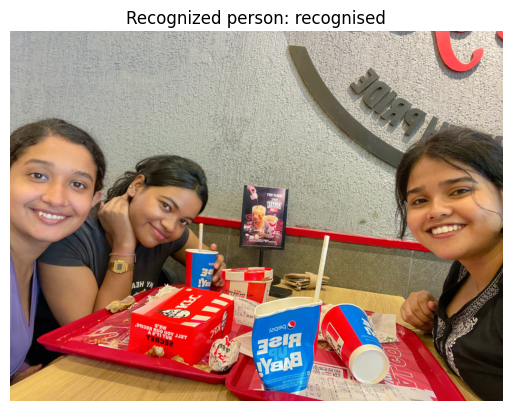

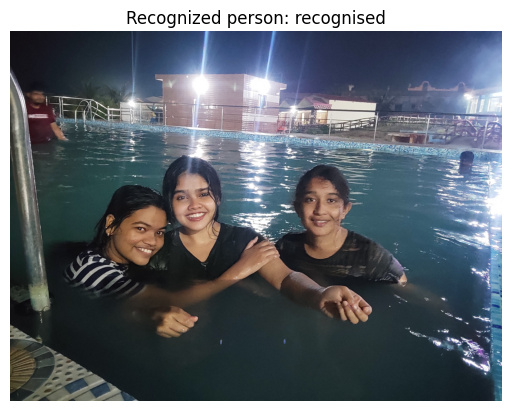

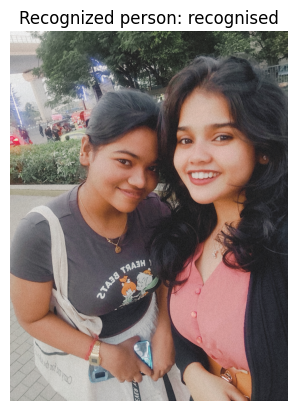

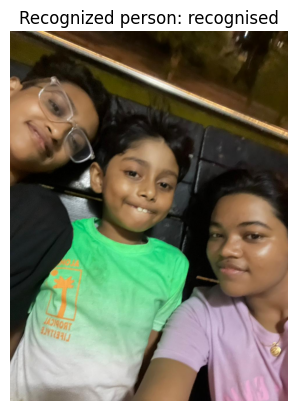

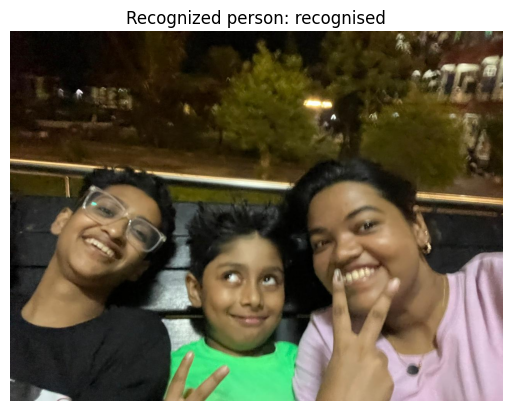

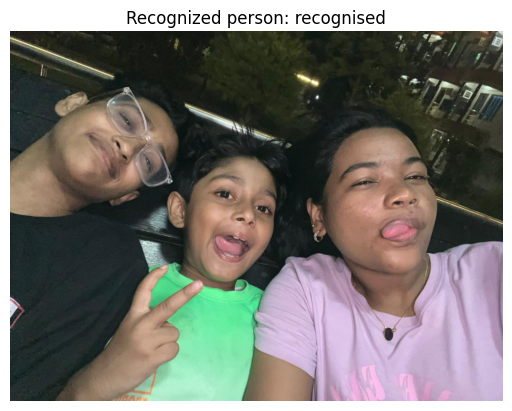

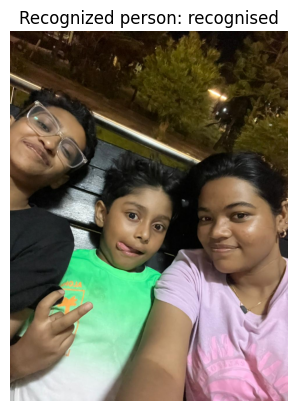

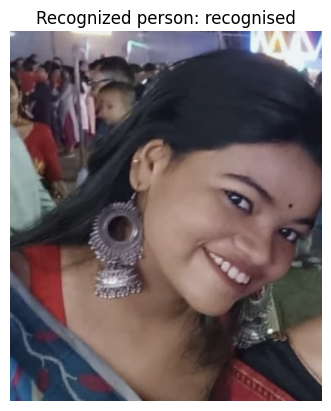

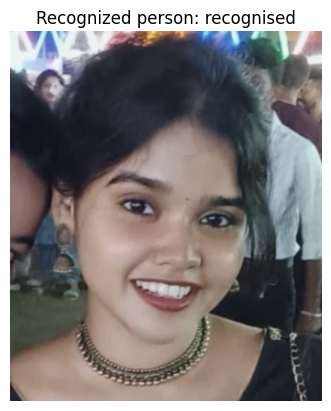

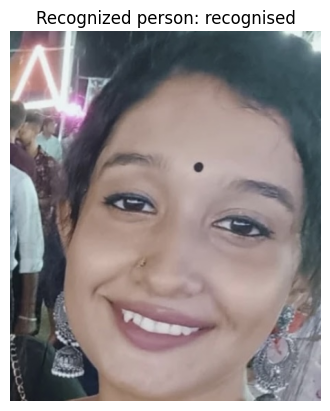

In [107]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ... (rest of your existing code) ...

# Verify the path and mount Drive if needed
mono_face_test_directory = r'/content/drive/MyDrive/Directory /Testing Images'  # Double-check this path
print("Current working directory:", os.getcwd())  # Print current directory to help verify
print("Contents of MyDrive:", os.listdir('/content/drive/MyDrive'))  # List contents of MyDrive

# If you're in Colab and haven't mounted Drive, uncomment and run:
# from google.colab import drive
# drive.mount('/content/drive')

# Running the test
test_on_mono_faces(mono_face_test_directory, known_face_encodings, known_face_names)


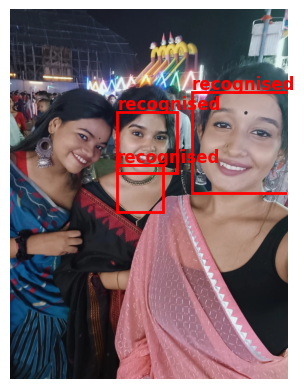

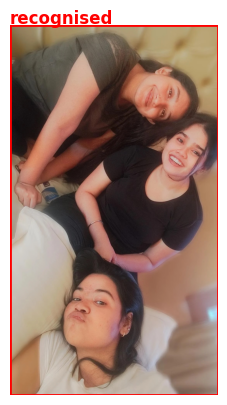

ValueError: time data 'IMG_20230311_1334' does not match format '%Y%m%d%H%M%S'

In [108]:
# Test on Multi faces
multi_face_test_directory = r'/content/drive/MyDrive/Directory /Testing Images'
test_on_multi_faces(multi_face_test_directory, known_face_encodings, known_face_names)

In [72]:
import os
import cv2
from deepface import DeepFace
import numpy as np

# Load known faces and their names
known_faces = {
    "Tannishtha Roy Chowdhury": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Tannishtha Roy Chowdhury /IMG_6219.JPG",
        "facial_features": None,
        "name": "Tannishtha Roy Chowdhury"
    },
    "Shreya Singha Roy": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Shreya Singha Roy /9626a63f-db9b-4f6d-9215-ba0f07b76d73.jpg",
        "facial_features": None
    },
    "Debarati Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Debarati Sarkar/7f7c2ccf-3052-452e-92e4-fbce5a0e2921.jpg",
        "facial_features": None
    },
    "Aishi Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Aishi Sarkar/IMG-20240604-WA0038.jpg",
        "facial_features": None
    },
    "Om Sarkar": {
        "image_path": "/content/drive/MyDrive/Directory /Training Images/Aishi Sarkar/IMG-20240604-WA0040.jpg",
        "facial_features": None
    }
}

def monofacetest(image_directory, known_faces):
    for image_name in os.listdir(image_directory):
        image_path = os.path.join(image_directory, image_name)
        image = cv2.imread(image_path)

        if image is None:
            print(f"Error loading {image_name}: Invalid image file")
            continue

        try:
            # Extract the face from the image
            results = DeepFace.extract_faces(img_path=image_path, enforce_detection=False)

            if not results:
                print(f"No face found in {image_name}")
                continue

            # Process only the first face found in the image
            face_region = results[0]

            # Verify the detected face against the known faces
            found_match = False
            for name, details in known_faces.items():
                known_image_path = details["image_path"]
                try:
                    result = DeepFace.verify(img1_path=image_path, img2_path=known_image_path, enforce_detection=False)
                    if result["verified"]:
                        distance = result["distance"]
                        print(f"Detected {name} in {image_name} with distance: {distance}")
                        found_match = True
                        break
                except Exception as e:
                    print(f"Error verifying {name} in {image_name}: {str(e)}")

            if not found_match:
                print(f"Unknown face detected in {image_name}")

        except Exception as e:
            print(f"Error processing {image_name}: {str(e)}")

# Example usage
monoface_detection = '/content/drive/MyDrive/Directory /Testing Images'
monofacetest(monoface_detection, known_faces)

Detected Tannishtha Roy Chowdhury in 1000221691.webp with distance: 0.3356976409479583
Unknown face detected in IMG_20230311_133422_151_Original.JPG
Unknown face detected in IMG_20230311_100830_258_Original.JPG
Detected Shreya Singha Roy in 1000243414.jpg with distance: 0.5050292154963449
Detected Tannishtha Roy Chowdhury in 1000240110.jpg with distance: 0.6388661762130483
Detected Tannishtha Roy Chowdhury in 1000204691.jpg with distance: 0.4376912734498404
Detected Tannishtha Roy Chowdhury in IMG_1916.JPG with distance: 0.5600244685983167
Detected Debarati Sarkar in 1000226089.jpg with distance: 0.6269199331211597
Detected Tannishtha Roy Chowdhury in IMG_3251.JPG with distance: 0.6685431793412964
Detected Tannishtha Roy Chowdhury in IMG_1839.JPG with distance: 0.37219135392104563
Detected Tannishtha Roy Chowdhury in IMG_5741.JPG with distance: 0.6543235422207262
Detected Tannishtha Roy Chowdhury in IMG_6074.JPG with distance: 0.57720814286808
Detected Tannishtha Roy Chowdhury in IMG_6